# Skilaverkefni09. Stærð- og Reiknifræði REI201G
### Donn Eunice Bartido deb5@hi.is 
mars 2023


## Lausn 35. Póker

In [2]:
from random import sample

def pókerhönd():
  stokkur = [(i,j) for i in range(1,5) for j in range(1,14)]
  return sample(stokkur, 5)

def með_tvær_tvennur(hönd):
  # Skilar sönnu ef hönd geymir tvær tvennur
  gildi = [spil[1] for spil in hönd]
  M = set(gildi)                 # búa til mengi
  if len(M) != 3:
    return False                 # það verða að vera 3 gildi
  for spil in M:
    talning = gildi.count(spil)
    if talning > 2: return False # og ekkert spil má koma 3svar
  return True                    # það eru tvær tvennur!

def hlutfall_með_2x2(n):
  talning = 0
  for i in range(n):
    hönd = pókerhönd()
    if með_tvær_tvennur(hönd):
      talning += 1
  return talning/n

hf = hlutfall_með_2x2(100000)
print(f'Hlutfall með tvær tvennur: {hf*100:.1f}%')

Hlutfall með tvær tvennur: 4.7%


### Lausn 35.1 - tvenna

In [130]:
# Lausn við 35.1 Kannar hvort að hönd geymi tvennu

def ertvenna(hönd):
# Skilar sönnu ef hönd geymir tvær tvennur
    gildi = [spil[1] for spil in hönd]
    M = set(gildi)  # búa til mengi
    if len(M) == 4:
        for spil in M:
            talning = gildi.count(spil)
            if talning == 2: 
                return True # ekkert spil má koma 3svar
    return False   


ertvenna(pókerhönd())

True

### Lausn 31.2 - Þrenna

In [137]:
# Lausn við 35.2 Kannar hvort að hönd geymi þrennu

def er_Þrenna(hönd):
# Skilar sönnu ef hönd geymir þrennu
    gildi = [spil[1] for spil in hönd]
    M = set(gildi)  # búa til mengi
    if len(M) == 3:
        for spil in M:
            talning = gildi.count(spil)
            if talning == 3: 
                return True # ekkert spil má koma 4svar
    return False   


er_Þrenna(pókerhönd())

False

### Lausn 31.3 - Fullt hús

In [152]:
def er_fullt_hus(hönd):
# Skilar sönnu ef hönd geymir þrennu
    gildi = [spil[1] for spil in hönd]
    M = set(gildi)  # búa til mengi
    if len(M) == 2:
        for spil in M:
            talning = [gildi.count(i) for i in M]
            if ( 2 in talning and 3 in talning):
                return True 
    return False   


er_fullt_hus(pókerhönd())

False

### Lausn 35.4 - lit (t.d eintómir spaðar) 

In [135]:
def er_eintom_lit(hönd):
# Skilar sönnu ef hönd geymir eintóm lit af spilastokk - t.d eintómir spaðar 
    gildi = [spil[0] for spil in hönd]
    M = set(gildi)  # búa til mengi
    if len(M) == 1:
        return True
    return False   


er_eintom_lit(pókerhönd())

False

### Lausn 35.5 Hermið slíkar hendur 

In [154]:
def hlutfall(n):
    tvennur = 0 
    þremur = 0 
    fullt_hus = 0
    litur = 0
    
    for i in range(n): 
        if ertvenna(pókerhönd()):
            tvennur += 1
        if er_Þrenna(pókerhönd()):
            þremur +=1
        if er_fullt_hus(pókerhönd()):
            fullt_hus +=1
        if er_eintom_lit(pókerhönd()):
            litur += 1
    return tvennur, þremur, fullt_hus, litur

first, second, third, fourth = hlutfall(1000000)

print(f'Hlutfall með tvennu: {first/10000:.3f}%')
print(f'Hlutfall með þrennu: {second/10000:.3f}%')
print(f'Hlutfall með fullt hús: {third/10000:.3f}%')
print(f'Hlutfall með eintóma lit: {fourth/10000:.3f}%')

Hlutfall með tvennu: 42.322%
Hlutfall með þrennu: 2.148%
Hlutfall með fullt hús: 0.144%
Hlutfall með eintóma lit: 0.198%


## Lausn 36. Stærð Jarðskjálfta

### Lausn 36.1 

Skrifið fall sem reiknar (og skilar) stærð jarðskjálfta fyrir gefið vægi. Hafið skjölunarstreng með. 
- Prófið með 𝑀0=1016 sem á að skila 𝑀=4.6


In [155]:
from math import log10, e
import pandas as pd

def skjalfti(M0):
    M = 2/3 * (log10(M0)- 9.1)
    return M
print(skjalfti(1e16))
    

4.6


### Lausn 36.2

20. október 2020 varð stór jarðskjálfti nálægt Krýsuvík. Á netinu má finna þrjár mælingar á orku skjálftans frá þremur alþjóðlegum jarðskjálftamiðstöðvum:

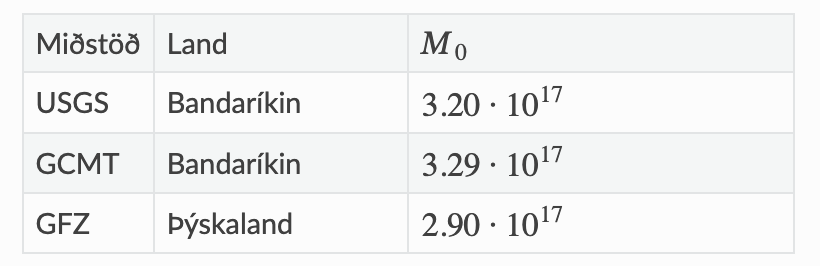

Skrifið forrit sem býr til uppflettitöflu stærð með orku jarðskjálftanna skv. miðstöðvunum þremur (þannig t.d. að stærð["USGS"] sé 3.20e17), og skrifar í framhaldi út töflu yfir niðurstöðuna sem byrjar svona:

In [165]:
data = [["USGS", "Bandaríkin", 3.30 * 1e17],["GCMT","Bandaríkin",3.29 * 1e17],["GFZ", "Þýskaland", 2.90 * 1e17 ]]

df = pd.DataFrame(data, columns= ["Miðstöð", "Land", "M0"])
for i in df["M0"]:
    df["Stærð"] = skjalfti(i)
    
df


,Miðstöð,Land,M0,Stærð
0,USGS,Bandaríkin,3.300000e+17,5.574932
1,GCMT,Bandaríkin,3.290000e+17,5.574932
2,GFZ,Þýskaland,2.900000e+17,5.574932


## 37. Valkvæðir Stikar

In [162]:
import math
def rót(x, n=2):  # skilar n-tu rót (n=2 er sjálfgefið)
   return x**(1/n)

a = rót(16)
b = rót(16, 4)
print(f"rætur: {a} og {b}")

rætur: 4.0 og 2.0


### Lausn 37.1

In [174]:
from math import log

def lnrót(x,a):
    return round (log(x)/log(a))
lnrót(100,10)
lnrót(243,3)
lnrót(128,2)

data = [[100,10, lnrót(100,10)],[243,3, lnrót(243,3)], [128,2, lnrót(128,2)]]
df = pd.DataFrame(data, columns= ["x", "a", "log_a(x)"])

df
    

,x,a,log_a(x)
0,100,10,2
1,243,3,5
2,128,2,7


### Lausn 37.2

In [189]:
from math import exp

tolur = [math.exp(x) for x in range(6)]
print("Upphaflegar tölur:", lala)

def nauk(listi):
    listi1 = [float(f"{num:.4f}") for num in listi]
    return listi1
print("Nauk með 4", nauk(tolur))


Upphaflegar tölur: [[1.0, 2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 148.4131591025766]]
Nauk með 4 [1.0, 2.7183, 7.3891, 20.0855, 54.5982, 148.4132]
